In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

 

# 데이터 불러오기
iris = datasets.load_iris()
X = iris.data  # (150, 4) - 꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비
y = iris.target.reshape(-1, 1)  # (150, 1) - 정수 레이블

 

# 원-핫 인코딩 (3개의 클래스: Setosa, Versicolor, Virginica)
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y)  # (150, 3)

 

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)  # 평균 0, 분산 1로 조정

 

# 학습/테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [41]:
model = Sequential()

model.add(Dense(32, input_shape=(4,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.3663 - loss: 1.4223 - val_accuracy: 0.5000 - val_loss: 1.1867
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3594 - loss: 1.3631 - val_accuracy: 0.5000 - val_loss: 1.1559
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3993 - loss: 1.2703 - val_accuracy: 0.5000 - val_loss: 1.1244
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3715 - loss: 1.2733 - val_accuracy: 0.5417 - val_loss: 1.0941
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3507 - loss: 1.1703 - val_accuracy: 0.5833 - val_loss: 1.0664
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3542 - loss: 1.1538 - val_accuracy: 0.5833 - val_loss: 1.0395
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3785 - loss: 1.1911 - val_accuracy: 0.6250 - val_loss: 1.0125
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4010 - loss: 1.0876 - val_accuracy: 0.6250 - val_loss: 0.9864

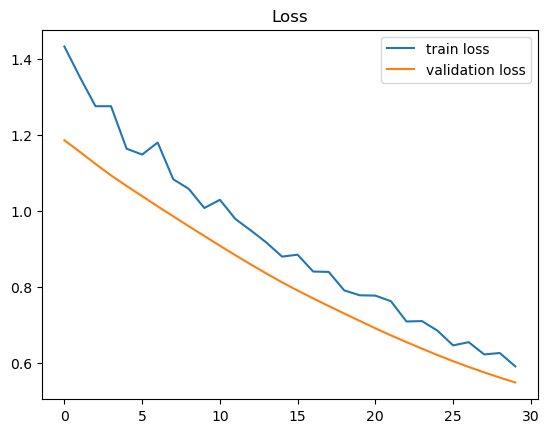

In [43]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, 
                    validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

In [44]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_04.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8333 - loss: 0.5076


Test score: 0.507564127445221
Test accuracy: 0.8333333134651184
